In [44]:
#Importing Libraries and Dataset


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("LoanApprovalPrediction.csv")


In [45]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [47]:
data.shape

(598, 13)

In [48]:
#Data Preprocessing and Visualization


obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


In [49]:
# Dropping Loan_ID column
data.drop(['Loan_ID'],axis=1,inplace=True)

In [50]:
data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


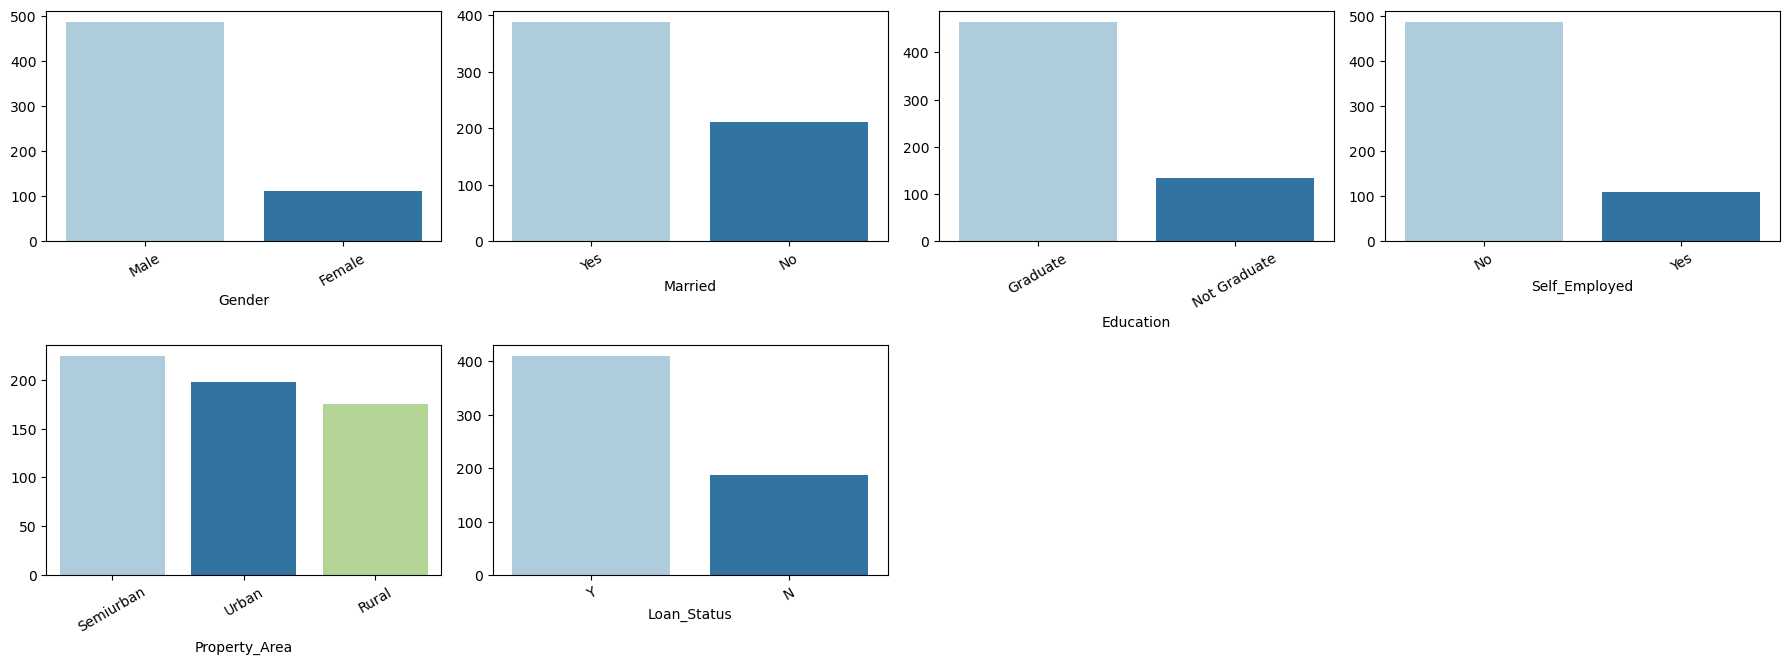

In [51]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=30)
  palette = sns.color_palette("pastel", len(y))
  sns.barplot(x=y.index, y=y.values, hue=y.index, palette="Paired", legend=False)
  index +=1 
  
plt.subplots_adjust(bottom=0.15)  # Increase space at the bottom
plt.tight_layout()
plt.show()


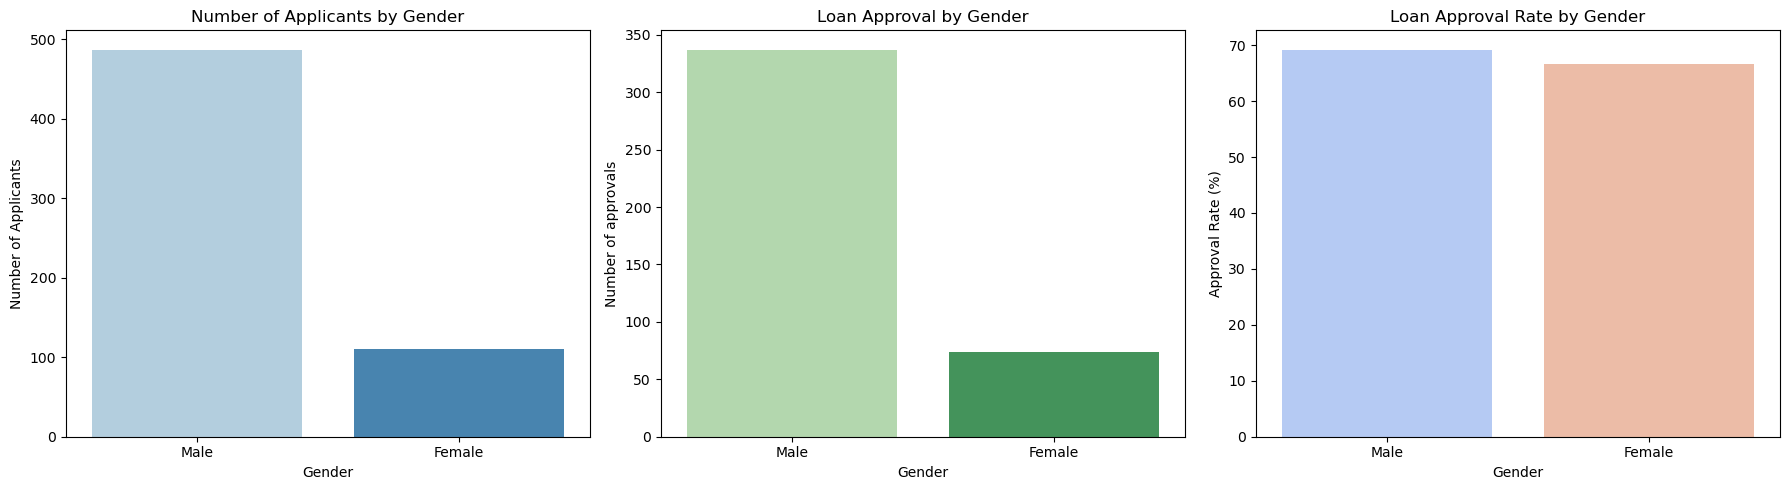

In [52]:
# Count of applicants by gender
gender_counts = data["Gender"].value_counts()

# Filtering approved loans
approved_loans = data[data["Loan_Status"] == "Y"]
gender_approved_counts = approved_loans["Gender"].value_counts()

# Calculate approval rate
approval_rate = (gender_approved_counts / gender_counts) * 100

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 2 columns

# Plot 1: Number of Applicants by Gender
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=axes[0], hue=gender_counts.index, palette="Blues", legend=False)
axes[0].set_title("Number of Applicants by Gender")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Number of Applicants")

# Plot 2: Approval by Gender
sns.barplot(x=gender_approved_counts.index, y=gender_approved_counts.values, ax=axes[1], hue=gender_approved_counts.index, palette="Greens", legend=False)
axes[1].set_title("Loan Approval by Gender")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Number of approvals")

# Plot 2: Approval rate by Gender
sns.barplot(x=approval_rate.index, y=approval_rate.values, ax=axes[2], hue=approval_rate.index, palette="coolwarm", legend=False)
axes[2].set_title("Loan Approval Rate by Gender")
axes[2].set_xlabel("Gender")
axes[2].set_ylabel("Approval Rate (%)")

# Show plots
plt.tight_layout()
plt.show()

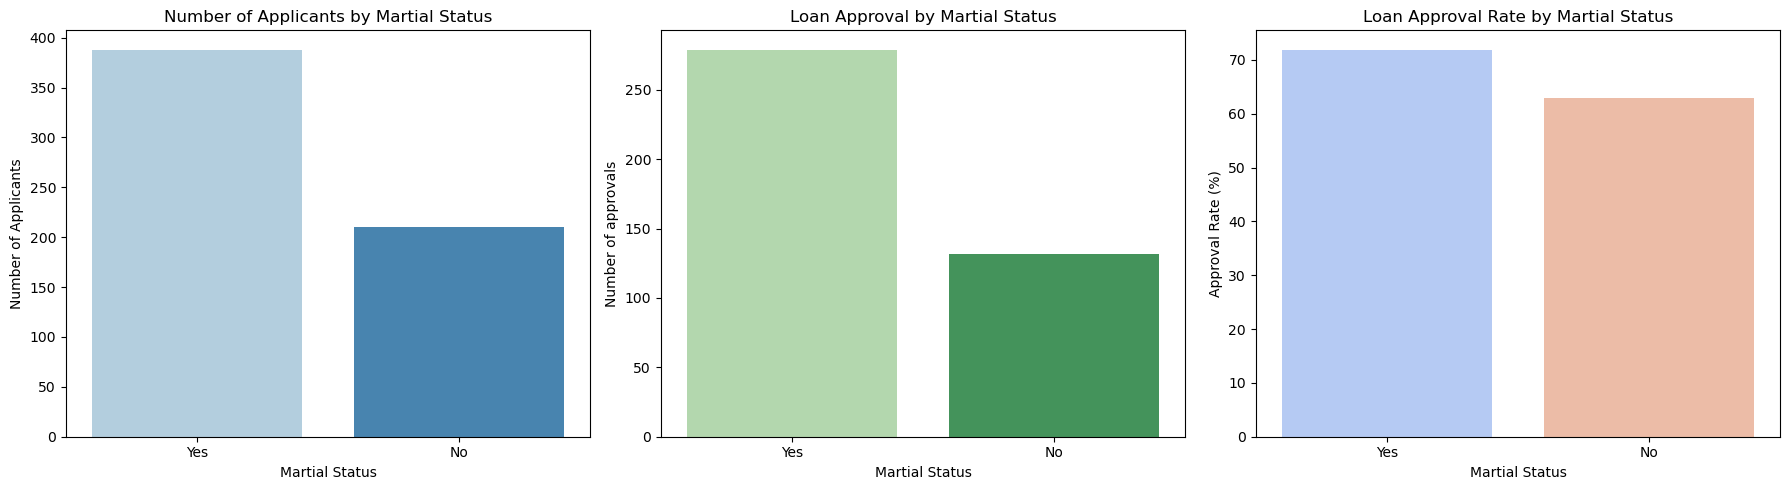

In [53]:
# Count of applicants by Martial Status
married_counts = data["Married"].value_counts()

# Filtering approved loans
#approved_loans = data[data["Loan_Status"] == "Y"]
married_approved_counts = approved_loans["Married"].value_counts()

# Calculate approval rate
married_approval_rate = (married_approved_counts / married_counts) * 100

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 2 columns

# Plot 1: Number of Applicants by Martial Status
sns.barplot(x=married_counts.index, y=married_counts.values, ax=axes[0], hue=married_counts.index, palette="Blues", legend=False)
axes[0].set_title("Number of Applicants by Martial Status")
axes[0].set_xlabel("Martial Status")
axes[0].set_ylabel("Number of Applicants")

# Plot 2: Approval by Gender
sns.barplot(x=married_approved_counts.index, y=married_approved_counts.values, ax=axes[1], hue=married_approved_counts.index, palette="Greens", legend=False)
axes[1].set_title("Loan Approval by Martial Status")
axes[1].set_xlabel("Martial Status")
axes[1].set_ylabel("Number of approvals")

# Plot 2: Approval rate by Gender
sns.barplot(x=married_approval_rate.index, y=married_approval_rate.values, ax=axes[2], hue=married_approval_rate.index, palette="coolwarm", legend=False)
axes[2].set_title("Loan Approval Rate by Martial Status")
axes[2].set_xlabel("Martial Status")
axes[2].set_ylabel("Approval Rate (%)")

# Show plots
plt.tight_layout()
plt.show()

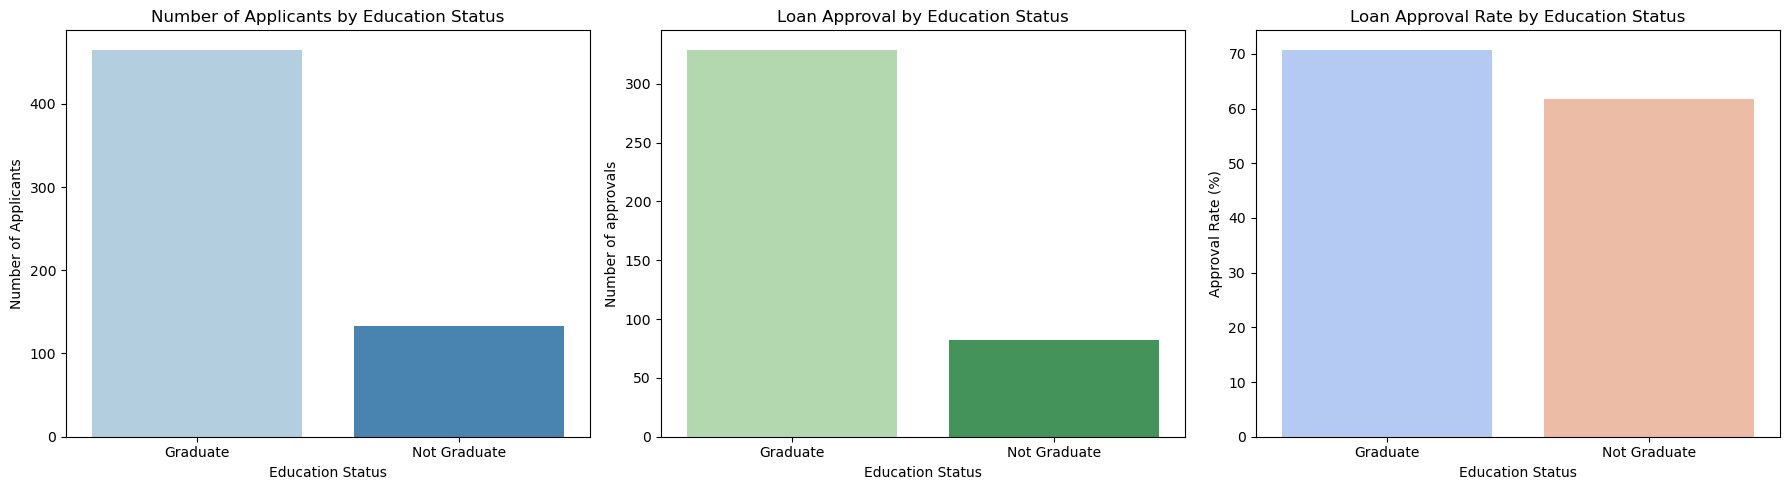

In [54]:
# Count of applicants by Education Status
Education_counts = data["Education"].value_counts()

# Filtering approved loans
#approved_loans = data[data["Loan_Status"] == "Y"]
Education_approved_counts = approved_loans["Education"].value_counts()

# Calculate approval rate
Education_approval_rate = (Education_approved_counts / Education_counts) * 100

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 2 columns

# Plot 1: Number of Applicants by Education Status
sns.barplot(x=Education_counts.index, y=Education_counts.values, ax=axes[0], hue=Education_counts.index, palette="Blues", legend=False)
axes[0].set_title("Number of Applicants by Education Status")
axes[0].set_xlabel("Education Status")
axes[0].set_ylabel("Number of Applicants")

# Plot 2: Approval by Education
sns.barplot(x=Education_approved_counts.index, y=Education_approved_counts.values, ax=axes[1], hue=Education_approved_counts.index, palette="Greens", legend=False)
axes[1].set_title("Loan Approval by Education Status")
axes[1].set_xlabel("Education Status")
axes[1].set_ylabel("Number of approvals")

# Plot 2: Approval rate by Education
sns.barplot(x=Education_approval_rate.index, y=Education_approval_rate.values, ax=axes[2], hue=Education_approval_rate.index, palette="coolwarm", legend=False)
axes[2].set_title("Loan Approval Rate by Education Status")
axes[2].set_xlabel("Education Status")
axes[2].set_ylabel("Approval Rate (%)")

# Show plots
plt.tight_layout()
plt.show()

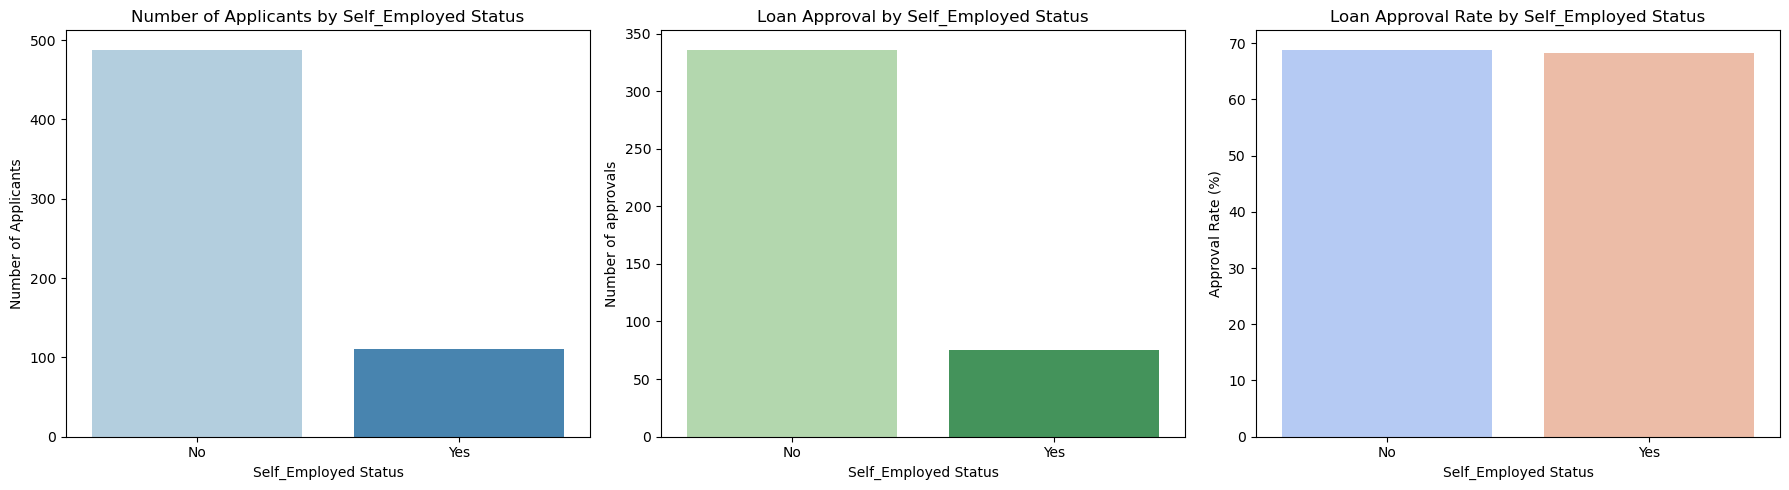

In [55]:
# Count of applicants by Self_Employed Status
Self_Employed_counts = data["Self_Employed"].value_counts()

# Filtering approved loans
#approved_loans = data[data["Loan_Status"] == "Y"]
Self_Employed_approved_counts = approved_loans["Self_Employed"].value_counts()

# Calculate approval rate
Self_Employed_approval_rate = (Self_Employed_approved_counts / Self_Employed_counts) * 100

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 2 columns

# Plot 1: Number of Applicants by Self_Employed Status
sns.barplot(x=Self_Employed_counts.index, y=Self_Employed_counts.values, ax=axes[0], hue=Self_Employed_counts.index, palette="Blues", legend=False)
axes[0].set_title("Number of Applicants by Self_Employed Status")
axes[0].set_xlabel("Self_Employed Status")
axes[0].set_ylabel("Number of Applicants")

# Plot 2: Approval by Self_Employed
sns.barplot(x=Self_Employed_approved_counts.index, y=Self_Employed_approved_counts.values, ax=axes[1], hue=Self_Employed_approved_counts.index, palette="Greens", legend=False)
axes[1].set_title("Loan Approval by Self_Employed Status")
axes[1].set_xlabel("Self_Employed Status")
axes[1].set_ylabel("Number of approvals")

# Plot 2: Approval rate by Self_Employed
sns.barplot(x=Self_Employed_approval_rate.index, y=Self_Employed_approval_rate.values, ax=axes[2], hue=Self_Employed_approval_rate.index, palette="coolwarm", legend=False)
axes[2].set_title("Loan Approval Rate by Self_Employed Status")
axes[2].set_xlabel("Self_Employed Status")
axes[2].set_ylabel("Approval Rate (%)")

# Show plots
plt.tight_layout()
plt.show()

In [56]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
for col in list(obj[obj].index):
  data[col] = label_encoder.fit_transform(data[col])

In [57]:
# To find the number of columns with 
# datatype==object
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


<Axes: >

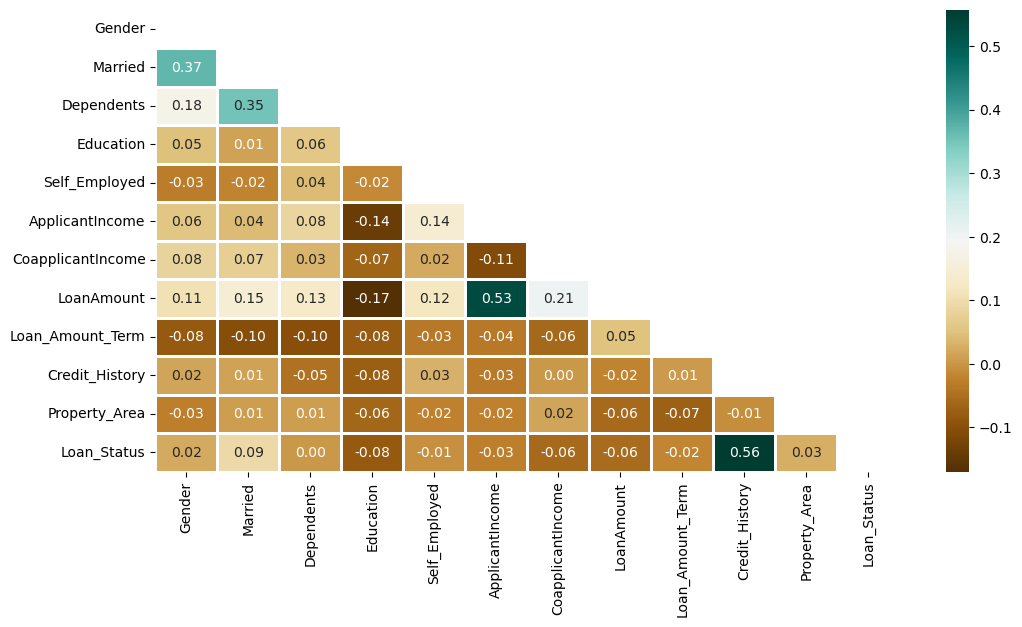

In [58]:
plt.figure(figsize=(12,6))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask,cmap='BrBG',fmt='.2f', linewidths=2,annot=True)

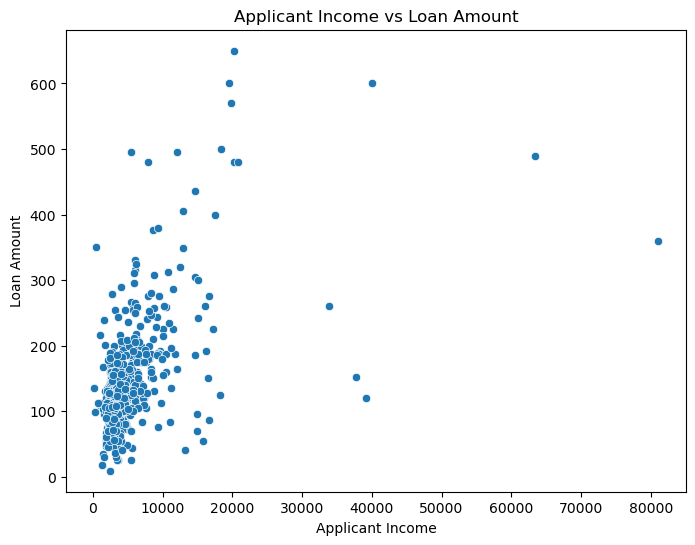

In [59]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['ApplicantIncome'], y=data['LoanAmount'])
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.title("Applicant Income vs Loan Amount")
plt.show()

In [60]:
print(data["Credit_History"].value_counts())

Credit_History
1.0    463
0.0     86
Name: count, dtype: int64


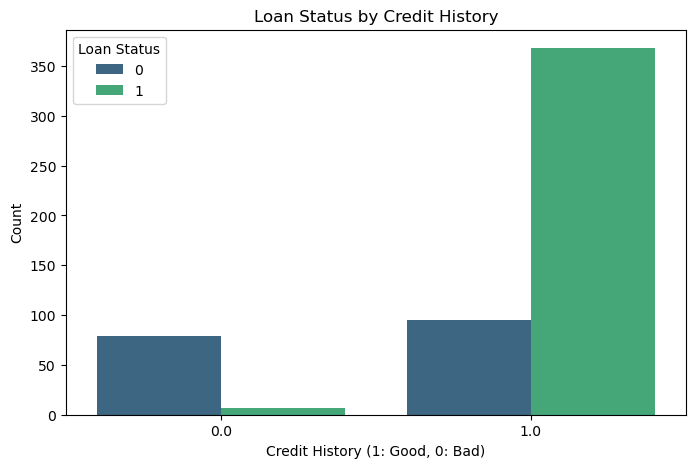

In [61]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Credit_History', hue='Loan_Status', data=data, palette='viridis')
plt.xlabel("Credit History (1: Good, 0: Bad)")
plt.ylabel("Count")
plt.title("Loan Status by Credit History")
plt.legend(title="Loan Status")
plt.show()

In [62]:
data.isna().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [63]:
for col in data.columns:
  data[col] = data[col].fillna(data[col].mean()) 
  
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [64]:
#Splitting Dataset


from sklearn.model_selection import train_test_split

X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((358, 11), (240, 11), (358,), (240,))

In [65]:
#Model Training and Evaluation (using KNeighborsClassifier, RandomForestClassifier, SupportVectorClassifiers & LogisticRegression)


from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Feature scaling (important for Logistic Regression & SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7, criterion = 'entropy', random_state =7)
svc = SVC()
lc = LogisticRegression(max_iter=500)

# making predictions on the training set
for clf in (rfc, knn, svc, lc):
    if isinstance(clf, (SVC, LogisticRegression)):  # Scale data for these models
        clf.fit(X_train_scaled, Y_train)
        Y_pred = clf.predict(X_train_scaled)
    else:
        clf.fit(X_train, Y_train)
        Y_pred = clf.predict(X_train)

    print(f"Accuracy score of {clf.__class__.__name__} = {100 * metrics.accuracy_score(Y_train, Y_pred):.2f}%")

Accuracy score of RandomForestClassifier = 98.04%
Accuracy score of KNeighborsClassifier = 78.49%
Accuracy score of SVC = 81.01%
Accuracy score of LogisticRegression = 80.45%


In [66]:
# making predictions on the testing set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of ",
          clf.__class__.__name__,"=",
          100*metrics.accuracy_score(Y_test,
                                     Y_pred))


Accuracy score of  RandomForestClassifier = 82.5
Accuracy score of  KNeighborsClassifier = 63.74999999999999
Accuracy score of  SVC = 69.16666666666667
Accuracy score of  LogisticRegression = 82.91666666666667


c:\Users\nihal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
